# Sugar Level classification :

Project Members :

Bhumika Ostwal

Aishwarya Karandikar

Chaitali Kannurkar

Chetan Bajaj

In [3]:
#Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import csv
sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#Load dataset and display
df = pd.read_csv('E:/Project/Sugarlevel_1.csv')
df

,Sugar level,Label
0,222,High
1,227,High
2,232,High
3,234,High
4,234,High
...,...,...
852,182,High
853,183,High
854,183,High
855,183,High


In [21]:
#Check whether there are any null values in dataset
df.isnull().sum()

Sugar level    0
Label          0
dtype: int64

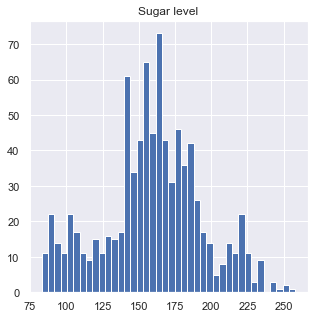

In [34]:
#Plot histogram
p = df.hist(bins=40,figsize = (5,5))

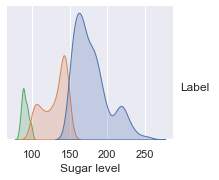

In [6]:
#Plot a pairplot for Label using seaborn
sns.pairplot(df.iloc[:, :2], hue='Label', corner=True)
plt.show()

In [7]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sugar level  857 non-null    int64 
 1   Label        857 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.5+ KB


In [10]:
#Split and assign column values to x and y for model fitting
x = df.iloc[:, 0:1].values
y = df.iloc[:,1:2].values

In [11]:
#Splitting data into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [12]:
#Scaling x train and test using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Applying models on data:

KNN(K-Nearest Neighbours) : Applying KNN Classifier

In [13]:
#Import KNN classifier and fit model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
#Predict y_pred
y_pred = classifier.predict(X_test)

In [12]:
#Generate classification report and confusion 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[110   0   0]
 [  0   6   0]
 [  0   0  56]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       110
         Low       1.00      1.00      1.00         6
      Normal       1.00      1.00      1.00        56

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



In [22]:
print("Accuracy Score =", format(metrics.accuracy_score(y_test, y_pred)))

Accuracy Score = 1.0


The Accuracy for KNN classifier is 1.0.And support for high,low and normal labels is 110,6 and 56 respectively.

SVM(Support Vector Machine)

In [16]:
#Fit SVM model using sklearn
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [17]:
#prediction
svc_pred = svc_model.predict(X_test)

In [18]:
#Accuracy score for model
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.9941860465116279


Decision Tree for classification:

We will classify sugar levels using Decision classifier using the training sets.Using metrics from sklearn package we can determine the accuracy score of decision tree.

In [19]:
#Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
#Accuracy score
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 1.0


After applying all four of the above models on sugar level dataset for classifying into high,low and normal level we observed that Decision tree classifier has highest accuracy.